In [4]:
!pip install pandas seaborn
!pip install skipy


[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
INFO: pip is looking at multiple versions of urllib3[socks] to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of urllib3[socks] to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 237.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 184.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 234.5 MB/s eta 0:00:00
  Attempting uninstall: urllib3
    Found existing installation: urllib3 2.2.2
    Uninstalling urllib3-2.2.2:
      Successfully uninstalled urllib3-2.2.2

[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


In [97]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import skipy as sp
import numpy as np

In [6]:
from numpy import dtype
df = pd.read_csv('medical_examination.csv', index_col=0)
df.head()

,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [7]:


df['overweight'] = pd.Series( (df['weight'] / (df['height'] / 100) ** 2) > 25, dtype=int)
df.head(10)

,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
id,,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1,0
3,17623,2,169,82.0,150,100,1,1,0,0,1,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0,0
8,21914,1,151,67.0,120,80,2,2,0,0,0,0,1
9,22113,1,157,93.0,130,80,3,1,0,0,1,0,1
12,22584,2,178,95.0,130,90,3,3,0,0,1,1,1
13,17668,1,158,71.0,110,70,1,1,0,0,1,0,1


In [8]:
df['cholesterol'] = pd.Series(df['cholesterol'] > 1, dtype=int)
df['gluc'] = pd.Series(df['gluc'] > 1, dtype=int)
df.head(10)

,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
id,,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0
8,21914,1,151,67.0,120,80,1,1,0,0,0,0,1
9,22113,1,157,93.0,130,80,1,0,0,0,1,0,1
12,22584,2,178,95.0,130,90,1,1,0,0,1,1,1
13,17668,1,158,71.0,110,70,0,0,0,0,1,0,1


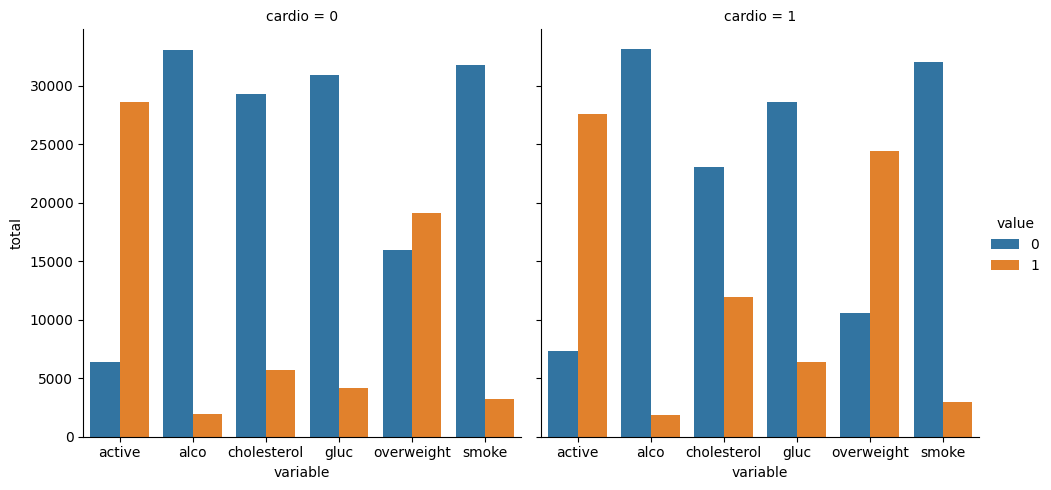

In [83]:
df_cat = df.melt(id_vars=['cardio'], value_vars=['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'overweight'])
pd.set_option("max_colwidth", None)
pd.set_option("max_seq_items", None)
# df_cat.head(122000)
# pd.DataFrame(df_cat.groupby(['cardio', 'variable', 'value'])['value'].count())

# pd.DataFrame(df_cat.groupby(['cardio', 'variable', 'value'])['value'].count()).rename(columns={'value': 'total'}).reset_index()


df_cat = pd.DataFrame(df_cat.groupby(['cardio', 'variable', 'value'])['value'].count()).rename(columns={'value': 'total'}).reset_index()
df_cat.head(30)

fig = sns.catplot(data=df_cat, x='variable', y='total', hue='value', col='cardio', kind='bar')

fig.savefig('catplot_my.png')

In [89]:
pressure_mask = (df['ap_lo'] <= df['ap_hi'])
low_height_mask = df['height'] >= df['height'].quantile(0.025)
hi_height_mask = df['height'] <= df['height'].quantile(0.975)
low_weight_mask = df['weight'] >= df['weight'].quantile(0.025)
hi_weight_mask = df['weight'] <= df['weight'].quantile(0.975)
df_heat = df[pressure_mask & low_height_mask & hi_height_mask & low_weight_mask & hi_weight_mask]
df_heat.head()

,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
id,,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0


In [ ]:
pd.set_option("max_colwidth", None)
pd.set_option("max_seq_items", None)

corr = df_heat.corr(numeric_only=True)
corr.head(13)
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
corr[mask] = np.nan

array([[ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True],
       [False,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True],
       [False, False,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True],
       [False, False, False,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True],
       [False, False, False, False,  True,  True,  True,  True,  True,
         True,  True,  True,  True],
       [False, False, False, False, False,  True,  True,  True,  True,
         True,  True,  True,  True],
       [False, False, False, False, False, False,  True,  True,  True,
         True,  True,  True,  True],
       [False, False, False, False, False, False, False,  True,  True,
         True,  True,  True,  True],
       [False, False, False, False, False, False, False, False,  True,
         True,  True,  True,  True],
       [False, False, False,